In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import linear_model

In [30]:
#create mock data
x = np.arange(0, 60)
y = list(map(lambda x: x / 2 + (x // 10) % 2 * 20 * x / 5 + np.random.random() * 10, x))
x = pd.DataFrame({'x': x})


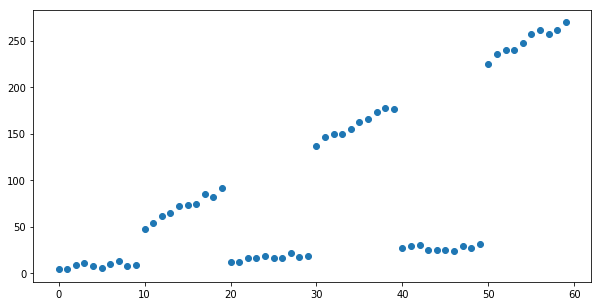

In [31]:
#Plot mock data
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.show()

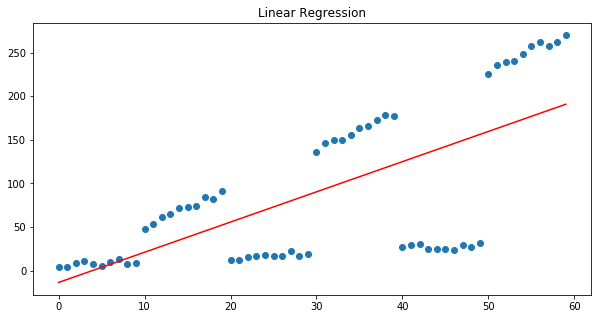

In [32]:
linear_regressor = linear_model.LinearRegression()

linear_regressor.fit(x, y)

plt.figure(figsize=(10, 5))
plt.title("Linear Regression")
plt.scatter(x, y)
plt.plot(x, linear_regressor.predict(x), color='r')
plt.show()

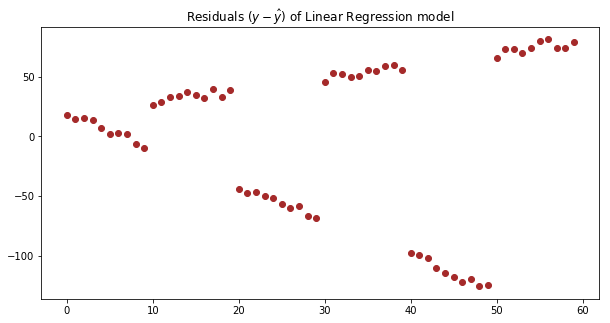

In [33]:
plt.figure(figsize=(10, 5))
plt.title("Residuals $(y - \hat{y})$ of Linear Regression model")
plt.scatter(x, y - linear_regressor.predict(x), color='brown')
plt.show()

It is also clear from this plot that there is a pattern in the residual errors, these are not random errors. We could fit model to the error terms from the output of the first model.



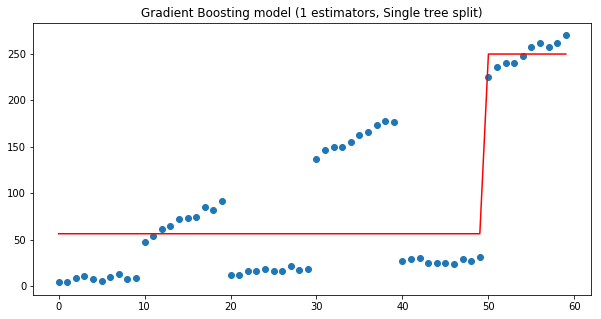

In [34]:
params = {
    'n_estimators': 1,
    'max_depth': 1,
    'learning_rate': 1,
    'criterion': 'mse'
}

gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

gradient_boosting_regressor.fit(x, y)

plt.figure(figsize=(10, 5))
plt.title('Gradient Boosting model (1 estimators, Single tree split)')
plt.scatter(x, y)
plt.plot(x, gradient_boosting_regressor.predict(x), color='r')
plt.show()

In the above figure, the decision tree is as follows: If x < 50, y = 56 and If x >= 50, y = 250

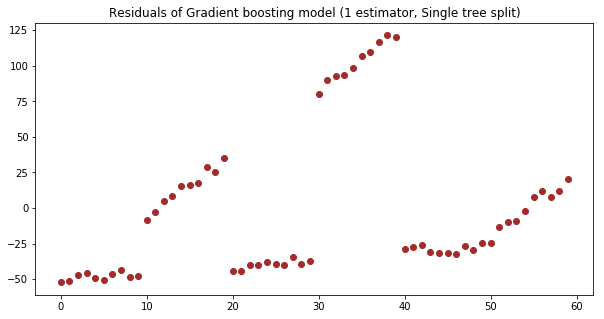

In [35]:
plt.figure(figsize=(10, 5))
plt.title('Residuals of Gradient boosting model (1 estimator, Single tree split)')
plt.scatter(x, y - gradient_boosting_regressor.predict(x), color='brown')
plt.show()

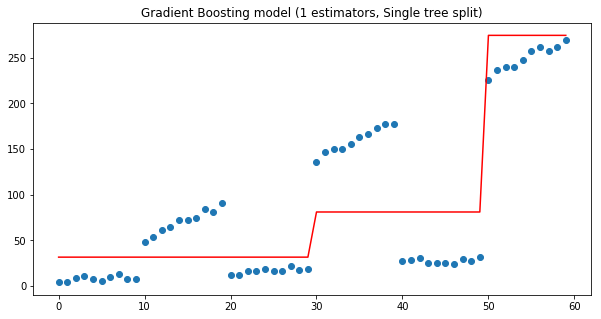

In [36]:
params['n_estimators'] = 2 ## number of base models increased

gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

gradient_boosting_regressor.fit(x, y)

plt.figure(figsize=(10, 5))
plt.title('Gradient Boosting model (1 estimators, Single tree split)')
plt.scatter(x, y)
plt.plot(x, gradient_boosting_regressor.predict(x), color='r')
plt.show()

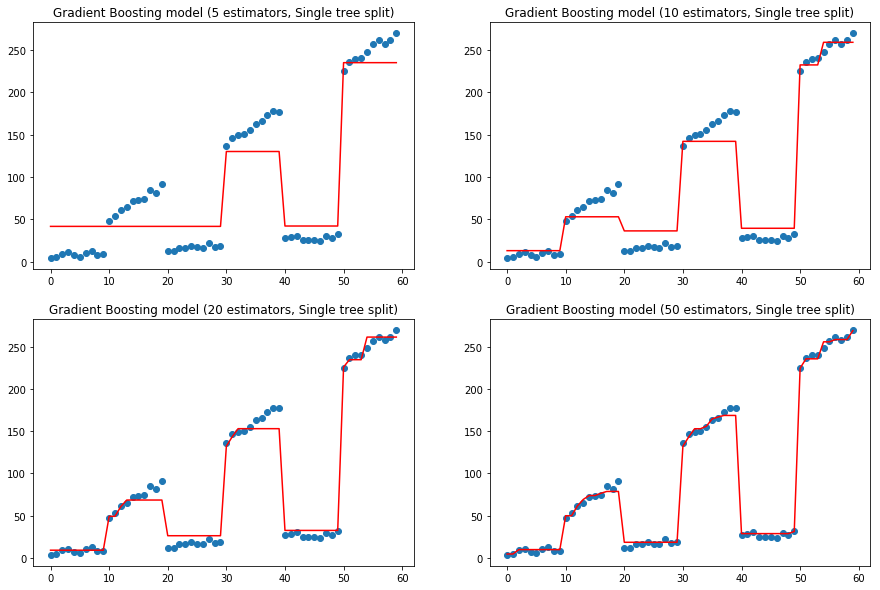

In [37]:
f, ax = plt.subplots(2, 2, figsize=(15, 10))

for idx, n_estimators in enumerate([5, 10, 20, 50]):
    params['n_estimators'] = n_estimators

    gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

    gradient_boosting_regressor.fit(x, y)
    subplot = ax[idx // 2][idx % 2]
    subplot.set_title('Gradient Boosting model ({} estimators, Single tree split)'.format(n_estimators))
    subplot.scatter(x, y)
    subplot.plot(x, gradient_boosting_regressor.predict(x), color='r')
plt.show()

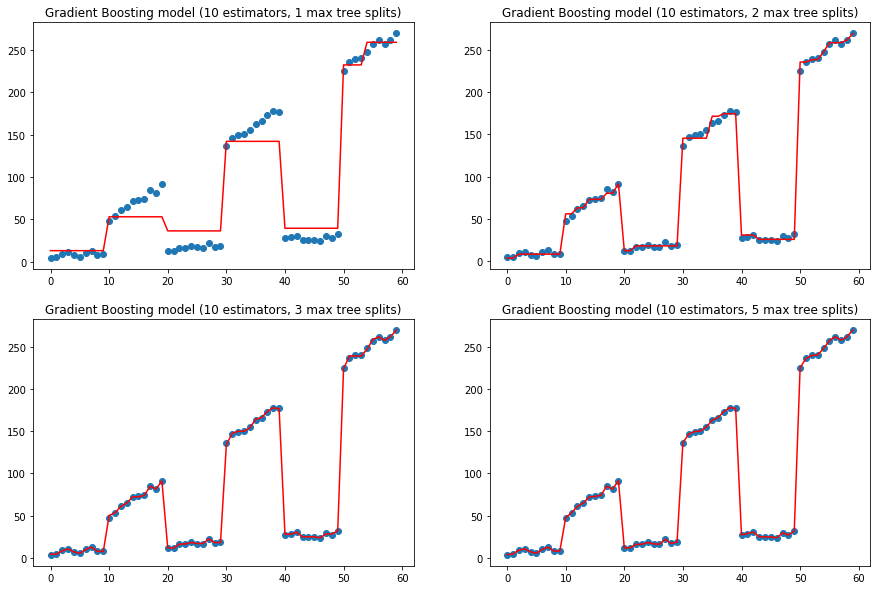

In [38]:
params['n_estimators'] = 10

f, ax = plt.subplots(2, 2, figsize=(15, 10))

for idx, max_depth in enumerate([1, 2, 3, 5]):
    params['max_depth'] = max_depth

    gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

    gradient_boosting_regressor.fit(x, y)
    subplot = ax[idx // 2][idx % 2]
    subplot.set_title('Gradient Boosting model (10 estimators, {} max tree splits)'.format(max_depth))
    subplot.scatter(x, y)
    subplot.plot(x, gradient_boosting_regressor.predict(x), color='r')
plt.show()

### Basics of PyTorch

First, install PyTorch and Torchvision.

In PyTorch, ndarray from numpy is equivalently called as a tensor. A tensor is nothing but a multidimensional array. 

In [40]:
import torch
import numpy as np

np_data = np.arange(6).reshape((2, 3))
torch_data = torch.from_numpy(np_data)
tensor2array = torch_data.numpy()
print(
    '\nnumpy array:', np_data,          # [[0 1 2], [3 4 5]]
    '\ntorch tensor:', torch_data,      #  0  1  2 \n 3  4  5    [torch.LongTensor of size 2x3]
    '\ntensor to array:', tensor2array, # [[0 1 2], [3 4 5]]
)


numpy array: [[0 1 2]
 [3 4 5]] 
torch tensor: tensor([[0, 1, 2],
        [3, 4, 5]]) 
tensor to array: [[0 1 2]
 [3 4 5]]


In [41]:
data = [-1, -2, 1, 2]
tensor = torch.FloatTensor(data)  # 32-bit floating point
print(
    '\nabs',
    '\nnumpy: ', np.abs(data),          # [1 2 1 2]
    '\ntorch: ', torch.abs(tensor)      # [1 2 1 2]
)


abs 
numpy:  [1 2 1 2] 
torch:  tensor([1., 2., 1., 2.])


In [42]:
# matrix multiplication
data = [[1,2], [3,4]]
tensor = torch.FloatTensor(data)  # 32-bit floating point
# correct method
print(
    '\nmatrix multiplication (matmul)',
    '\nnumpy: ', np.matmul(data, data),     # [[7, 10], [15, 22]]
    '\ntorch: ', torch.mm(tensor, tensor)   # [[7, 10], [15, 22]]
)


matrix multiplication (matmul) 
numpy:  [[ 7 10]
 [15 22]] 
torch:  tensor([[ 7., 10.],
        [15., 22.]])


In [60]:
from torch.autograd import Variable ## https://pytorch.org/docs/stable/autograd.html
x = Variable(torch.ones(1, 1), requires_grad=True) ## requires_grad indicates whether a variable is trainable
y = x + 2            # Create y from an operation
z = y * y * 2
z.backward() #Computes the gradient 
print(x.grad)

tensor([[12.]])


In [62]:
x = Variable(torch.ones(2, 2), requires_grad=True)
y = x + 2            # Create y from an operation
# Variable containing:
# 3  3
# 3  3
# [torch.FloatTensor of size 2x2]
z = torch.add(x, y)  # Same as z = x + y
z = y * y * 2
out = z.mean()
# Variable containing:
# 2
# [torch.FloatTensor of size 1]
out.backward() #Computes the gradient 
print(x.grad)


tensor([[3., 3.],
        [3., 3.]])


In [ ]:
## import torch
import torch.nn as nn #importing neural network package.
import torch.nn.functional as F ##Importing some useful mathematical functions.
import torch.optim as optim #importing optimization package.

torch.manual_seed(1)

Implement a function f(x) = Ax, where A is a (m x n) matrix. 

In [15]:
lin = nn.Linear(5, 3, bias = False)  # maps from R^5 to R^3, parameters A. If bias is not false, it will implement Ax+b.
# data is 2x5.  A maps from 5 to 3... can we map "data" under A?
data = torch.randn(2, 5)
print(data)
print(lin)
print(lin(data))  # yes

tensor([[-0.6388, -0.7874, -2.4998,  0.1974, -2.4616],
        [-0.2671,  1.5170, -1.9809,  0.5254,  0.3045]])
Linear(in_features=5, out_features=3, bias=False)
tensor([[ 0.1743, -1.4606, -0.4493],
        [-0.0320, -1.2960,  0.0760]], grad_fn=<MmBackward>)


In [9]:
#ReLU activation function 
data = torch.randn(2, 2)
print(data)
print(F.relu(data))

tensor([[-0.5404, -2.2102],
        [ 2.1130, -0.0040]])
tensor([[0.0000, 0.0000],
        [2.1130, 0.0000]])


In [16]:
#Softmax Activation function
data = torch.randn(5)
print(data)
print(F.softmax(data, dim=0))
print(F.softmax(data, dim=0).sum())  # Sums to 1 because it is a distribution!
print(F.log_softmax(data, dim=0))  # theres also log_softmax

tensor([ 0.8922,  2.1862, -0.4101,  0.5338, -1.5819])
tensor([0.1754, 0.6396, 0.0477, 0.1225, 0.0148])
tensor(1.)
tensor([-1.7409, -0.4469, -3.0431, -2.0993, -4.2150])


### Logistic Regression using PyTorch

The task of using Logistic Regression (or other techniques in future) with PyTorch could be broken down into seven steps. 

In [76]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


#STEP 1: LOADING DATASET

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

len(train_dataset)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:04, 2339803.52it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 125565.14it/s]           
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:02, 794062.08it/s]                             
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 47733.66it/s]            

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


60000

In [77]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

train_dataset[0][0].numpy().shape

(1, 28, 28)

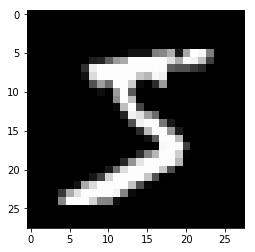

In [96]:
show_img = train_dataset[0][0].numpy().reshape(28, 28)

plt.imshow(show_img, cmap='gray')

In [97]:
#Check label
train_dataset[0][1]

5

In [98]:
test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

len(test_dataset)




In [99]:
## Setting parameters of the SGD algorithm (without replacement of sampled data)
batch_size = 100 #mini batch SGD
n_iters = 3000

#One epoch is the SGD algorithm is the number of iterations taken to use up all the samples in the dataset. 
#Here, one epoch is 60,000 / 100 = 600 iterations.

num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs


5

In [86]:
#STEP 2: MAKING DATASET ITERABLE

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

#STEP 3: CREATE MODEL CLASS


class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out


In [89]:
#STEP 4: INSTANTIATE MODEL CLASS
input_dim = 28*28
output_dim = 10
model = LogisticRegressionModel(input_dim, output_dim)

#STEP 5: INSTANTIATE LOSS CLASS

criterion = nn.CrossEntropyLoss()

#STEP 6: INSTANTIATE OPTIMIZER CLASS

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 


#STEP 7: TRAIN THE MODEL

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = images.view(-1, 28*28).requires_grad_()
        labels = labels

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


Iteration: 500. Loss: 1.864404559135437. Accuracy: 67
Iteration: 1000. Loss: 1.5284833908081055. Accuracy: 76
Iteration: 1500. Loss: 1.2871650457382202. Accuracy: 79
Iteration: 2000. Loss: 1.190455436706543. Accuracy: 81
Iteration: 2500. Loss: 1.1205456256866455. Accuracy: 82
Iteration: 3000. Loss: 0.9453301429748535. Accuracy: 82


In [91]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs[0, :])
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
tensor([-0.2529, -1.2457, -0.2763, -0.1203,  0.1233, -0.4988, -1.1273,  2.9627,
        -0.2093,  1.0990], grad_fn=<SliceBackward>)


In [92]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted[0])

PREDICTION
tensor(7)
